In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scikit_posthocs as sp

import warnings
warnings.filterwarnings("ignore")

# Plot Functions

In [118]:
margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['Dataset'], as_index=False )['MAE'].rank(method='average', ascending = True)

    order = sample.groupby('Method')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['Method'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width,plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='Method', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    if file != "":
        ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

def generateHistogram(optimal_df):
    df = optimal_df.drop('dataset', axis=1)
    x = [0] * len(df.columns)
    
    for i in range(len(optimal_df)):
        row = df.iloc[i]
        x[np.sum(row)-1] += 1

    bin_edges = np.arange(0.5, len(x) + 1.5)

    values = []
    for i in range(len(x)):
        values.extend([i + 1] * x[i])

    ax = sns.histplot(values, bins=bin_edges, kde=True)
    ax.set(xlabel='Number of quantifiers in Algorithm Optimal Set', ylabel='Number of datasets')

    plt.xticks(np.arange(1, len(x) + 1))

    plt.show()

    ax.figure.savefig('./figs/aoptset_histogram.pdf', format="pdf", facecolor='w')

    return x

# Plotting results

# Quantifiers Hit Rate

In [119]:
hit_rate_table = pd.read_csv('./plot_data/plot_tables/recommender_hit_rate_table.csv')
hit_rate_table

,Method,HitRate,Std
0,Top1,0.917293,0.275438
1,Top3,1.000000,0.000000
2,Top5,1.000000,0.000000
3,CC,0.601504,0.489589
4,ACC,0.834586,0.371553
5,PACC,0.616541,0.486228
6,PCC,0.398496,0.489589
7,SMM,0.909774,0.286505
8,HDy,0.714286,0.451754
9,DyS,0.924812,0.263694


In [120]:
# OLD_hit_rate_table = pd.read_csv('./recommender_hit_table/BKP/recommender_hit_rate_table.csv')

# # Drop the specified rows from the dataframe
# indexes_to_drop = [1, 2, 4, 5, 7, 8, 10, 11, 13, 14]
# OLD_hit_rate_table = OLD_hit_rate_table.drop(indexes_to_drop)

# indexes_to_replace = [0, 3, 6, 9, 12]  # Example indexes to replace
# new_values = ['Top1', 'Top3', 'Top5', 'Top3+W', 'Top5+W']  # New values for the 'Method' column

# for index, new_value in zip(indexes_to_replace, new_values):
#     OLD_hit_rate_table.loc[index, 'Method'] = new_value

# # Display the updated dataframe
# OLD_hit_rate_table.reset_index(drop=True, inplace=True)
# OLD_hit_rate_table

## Plotting Quantification Results

In [121]:
experiment_table_path = './plot_data/plot_tables/experiment_table.csv'
experiment_table = pd.read_csv(experiment_table_path)

experiment_table = experiment_table[experiment_table['Method'] != 'TOPLINE']
experiment_table = experiment_table[experiment_table['Method'] != 'BASELINE+TOP3+MEAN']
experiment_table = experiment_table[experiment_table['Method'] != 'BASELINE+TOP5+MEAN']
experiment_table = experiment_table[experiment_table['Method'] != 'TOP3+MEAN']
experiment_table = experiment_table[experiment_table['Method'] != 'TOP5+MEAN']
# experiment_table = experiment_table[experiment_table['Method'] != 'BASELINE+TOP3+MEDIAN']
# experiment_table = experiment_table[experiment_table['Method'] != 'BASELINE+TOP5+MEDIAN']
# experiment_table = experiment_table[experiment_table['Method'] != 'BASELINE+TOP1']

experiment_table.replace({
   "TOP1": "Top-1",
   "TOP3+MEDIAN": "Top-3",
   "TOP5+MEDIAN": "Top-5",
   "TOP3+WEIGHTED": "Top-3+W",
   "TOP5+WEIGHTED": "Top-5+W",
   "BASELINE+TOP3+MEDIAN": "Baseline+3",
   "BASELINE+TOP5+MEDIAN": "Baseline+5",
   "BASELINE+TOP1": "Baseline"
   # "BASELINE+TOP3+WEIGHTED": "(B) Top-3+W",
   # "BASELINE+TOP5+WEIGHTED": "(B) Top-5+W",
}, inplace=True)



query_final = "Method in ['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'Top-1', 'Top-3', 'Top-3+W', 'Top-5', 'Top-5+W', 'X', 'Baseline+3', 'Baseline+5', 'Baseline']"
# query_final = "Method in ['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'Top-1', 'Top-3', 'Top-3+W', 'Top-5', 'Top-5+W', 'X']"

In [122]:
experiment_table['Method'].unique()

array(['ACC', 'Baseline', 'Baseline+3', 'Baseline+5', 'CC', 'DyS', 'HDy',
       'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'Top-1', 'Top-3',
       'Top-3+W', 'Top-5', 'Top-5+W', 'X'], dtype=object)

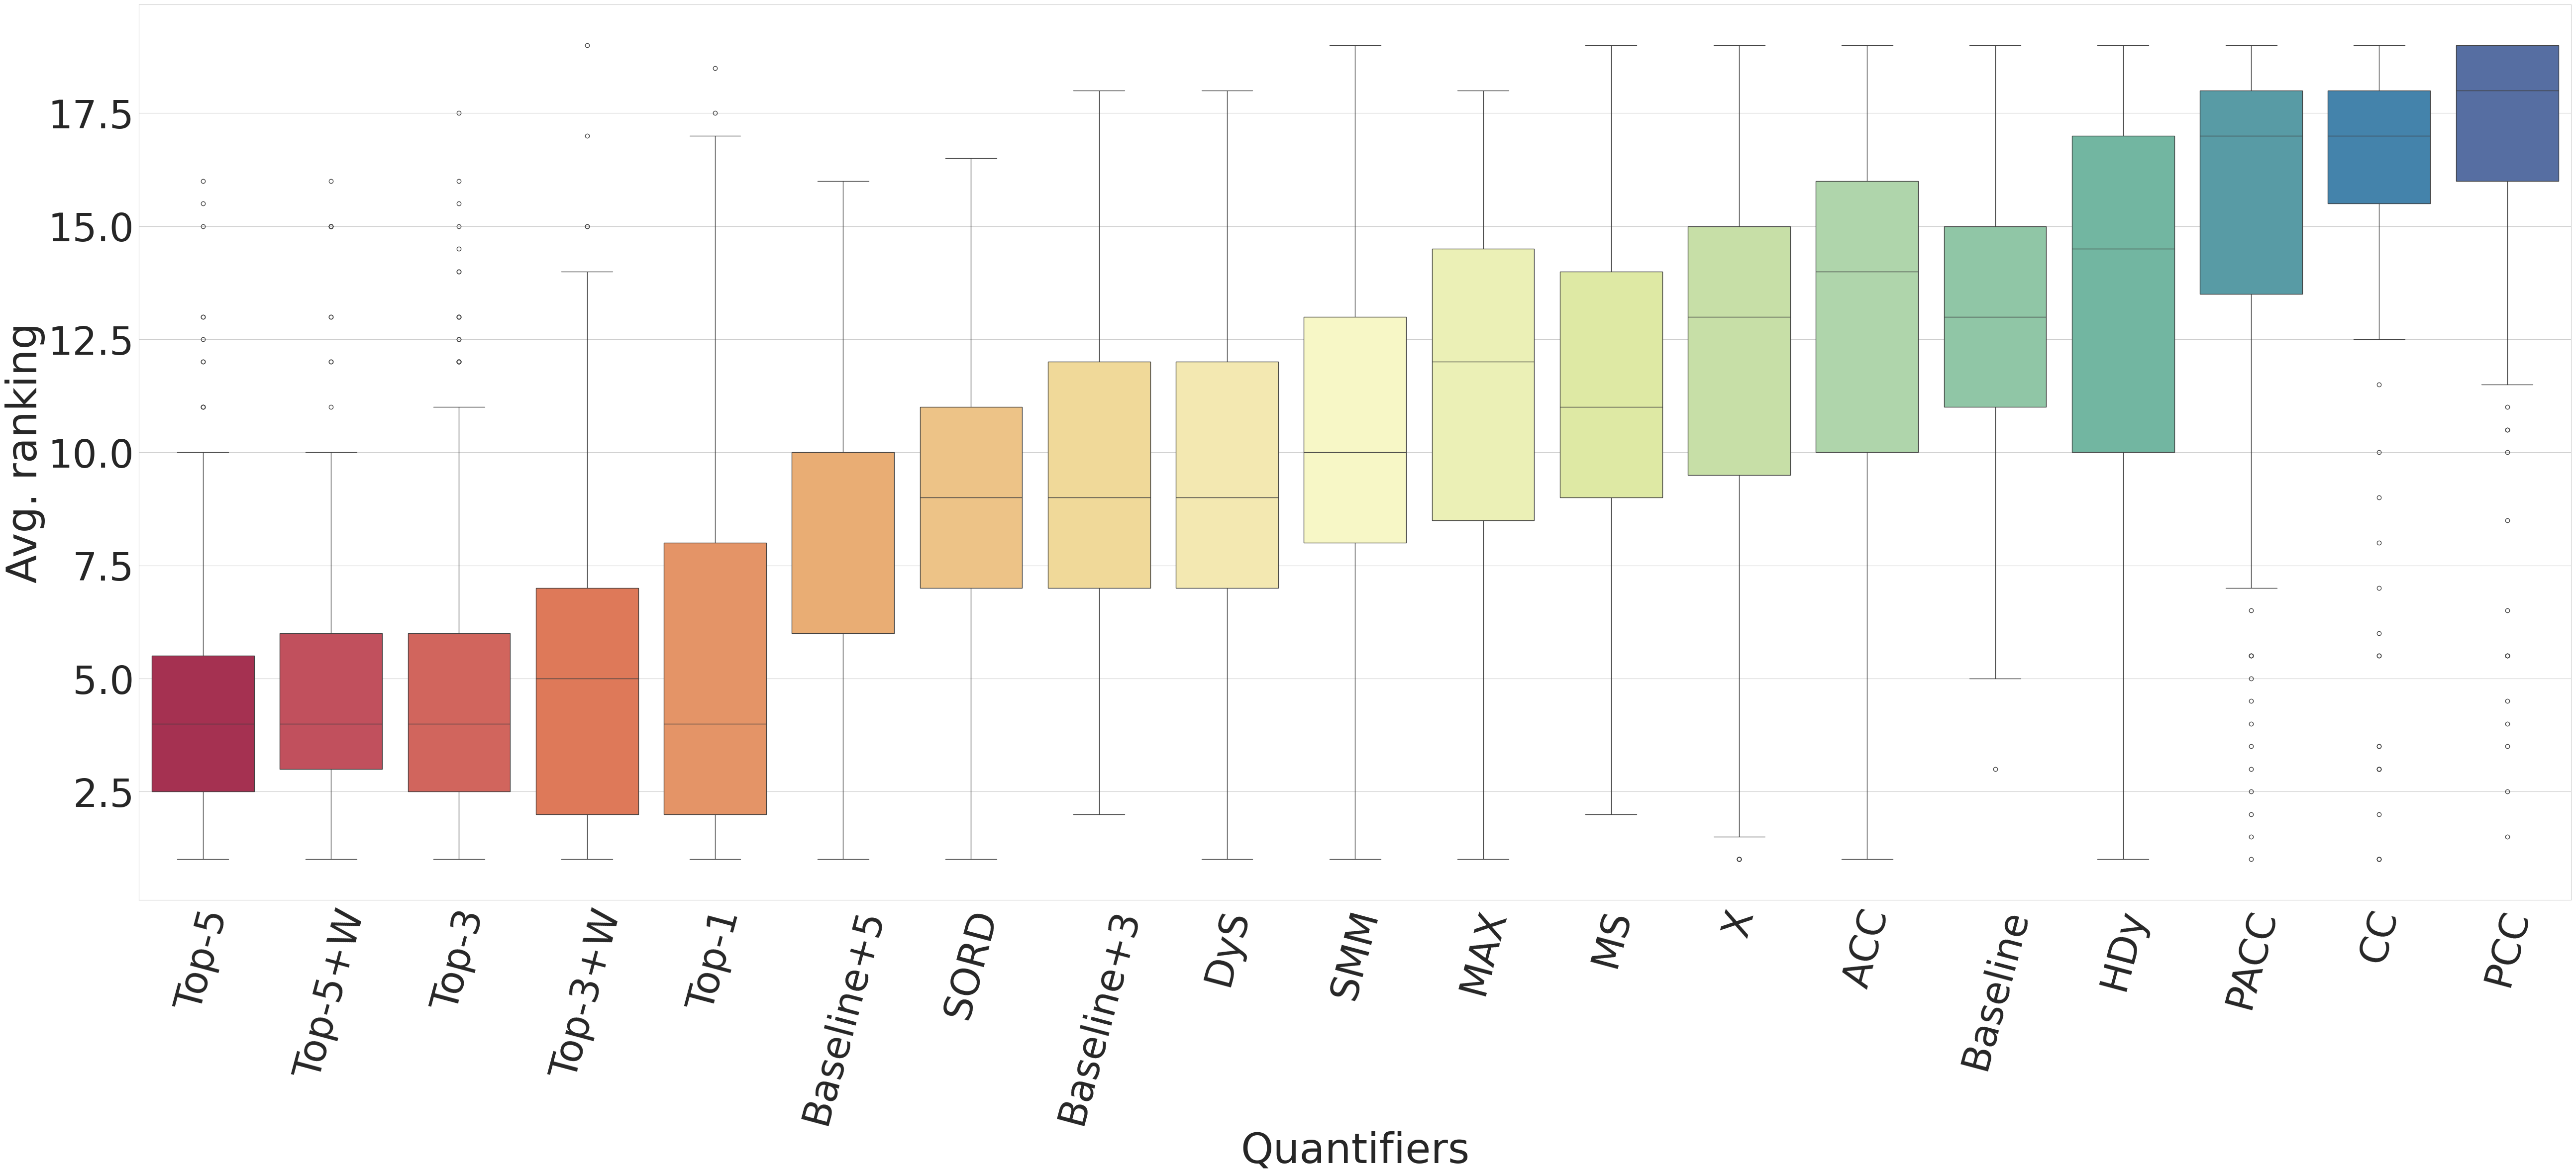

In [123]:
x= boxplotMae(experiment_table.query(query_final), 'boxall')

## Histogram of Quantifiers in ASetOpt (x) by Dataset (y)

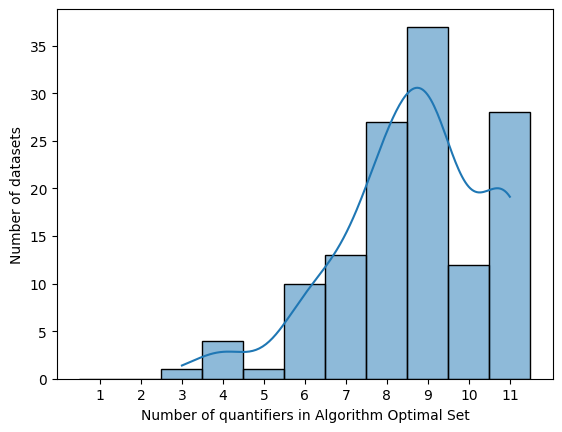

[0, 0, 1, 4, 1, 10, 13, 27, 37, 12, 28]


In [124]:
optimal_df = pd.read_csv('./plot_data/optimal_quantifiers.csv')
x = generateHistogram(optimal_df)

print(x)

# Critical Difference Diagram

In [125]:
# experiment_table_path = './plot_data/plot_tables/experiment_table.csv'
# experiment_table = pd.read_csv(experiment_table_path)

# experiment_table.replace({
#    "TOP1": "Top-1",
#    "TOP3+MEDIAN": "Top-3",
#    "TOP5+MEDIAN": "Top-5",
#    "TOP3+WEIGHTED": "Top-3+W",
#    "TOP5+WEIGHTED": "Top-5+W",
#    "BASELINE+TOP1": "(B) Top-1",
#    "BASELINE+TOP3+MEDIAN": "(B) Top-3",
#    "BASELINE+TOP5+MEDIAN": "(B) Top-5"
# }, inplace=True)

# experiment_table = experiment_table[experiment_table['Method'] != 'TOPLINE']
# experiment_table = experiment_table[experiment_table['Method'] != 'BASELINE+TOP3+MEAN']
# experiment_table = experiment_table[experiment_table['Method'] != 'BASELINE+TOP5+MEAN']
# experiment_table = experiment_table[experiment_table['Method'] != 'TOP3+MEAN']
# experiment_table = experiment_table[experiment_table['Method'] != 'TOP5+MEAN']
# experiment_table.reset_index(drop=True, inplace=True)

In [126]:
import numpy as np

alg_list = experiment_table['Method'].unique().tolist()
groups = []

for alg in alg_list:
    filtered_df = experiment_table[alg == experiment_table['Method']]
    filtered_df = filtered_df.drop(columns=['Method', 'Dataset'])
    values = filtered_df['MAE'].values
    groups.append(values)

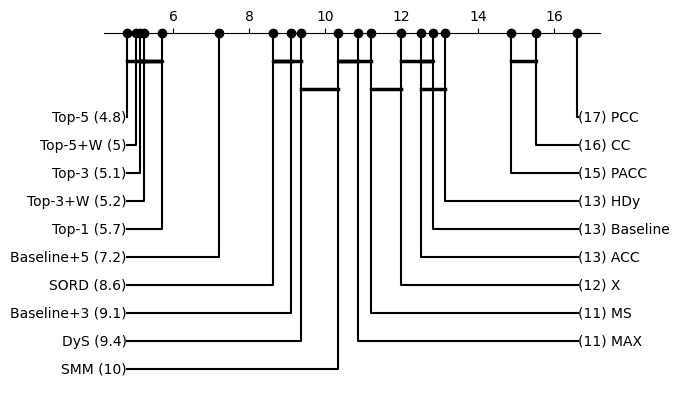

In [127]:
# Perform Conover post-hoc test
sig_matrix = sp.posthoc_conover_friedman(np.array(groups).T)

# Define the labels
labels = alg_list

# Create a DataFrame of the ranks
ranks = pd.DataFrame(groups, index=labels).T.rank(axis=1, ascending=True).mean(axis=0)

# Customize the diagram with black lines and a bold horizontal line
elbow_props = dict(color='black')
crossbar_props = dict(color='black', linewidth=2.5)  # Increase linewidth for boldness


# Create critical difference diagram with customized properties
fig, ax = plt.subplots()  # Create a new figure and axis
sp.critical_difference_diagram(ranks, sig_matrix, elbow_props=elbow_props, crossbar_props=crossbar_props)

# Save the plot as a PDF file
plt.savefig("./figs/critical_difference_diagram.pdf", format="pdf")

# Optionally, display the plot
plt.show()

# André

In [128]:
import os
import pandas as pd
import numpy as np

datasets_path = "./datasets/"
files = os.listdir(datasets_path)

description_table = pd.DataFrame(columns=['Dataset', 'Size', 'Positives Distribution'])

for dataset in files:
    df = pd.read_csv(datasets_path + dataset)

    name = dataset.split('.csv')[0]
    size = len(df)
    p_proportion = np.sum(df['class'].to_numpy()) / len(df)

    description_table.loc[len(description_table)] = [name, size, round(p_proportion, 2)]



description_table.to_csv('./plot_data/dataset_description_table.csv', index=False)

In [104]:
description_table.query('Size >= 1000')

,Dataset,Size,Positives Distribution
0,1043_ada_agnostic,4562,0.75
2,1049_pc4,1458,0.88
3,1050_pc3,1563,0.90
5,1056_mc1,9466,0.99
9,1068_pc1,1109,0.93
...,...,...,...
128,namao,34465,0.71
129,occupancy,20560,0.77
130,phoneme,5404,0.29
131,spambase,4601,0.61
